In [56]:
from tensorflow import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
fashion_mnist = keras.datasets.fashion_mnist

# Loading dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# transform to rgb as required by VGG
x_train=tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=3)) 
x_test=tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=3))

#resize to minimum size of (32x32)
x_train=tf.image.resize_with_pad(x_train,32,32)
x_test=tf.image.resize_with_pad(x_test,32,32)

x_train, x_test = x_train / 255., x_test / 255.

In [58]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [59]:
model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="sigmoid"),
   Dense(10, activation="softmax"),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [61]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=2048,
)

Epoch 1/50
30/30 [==============================] - 10s 305ms/step - loss: 1.7854 - accuracy: 0.5037
Epoch 2/50
30/30 [==============================] - 7s 221ms/step - loss: 1.0639 - accuracy: 0.7270
Epoch 3/50
30/30 [==============================] - 7s 223ms/step - loss: 0.8123 - accuracy: 0.7564
Epoch 4/50
30/30 [==============================] - 7s 228ms/step - loss: 0.7025 - accuracy: 0.7756
Epoch 5/50
30/30 [==============================] - 7s 228ms/step - loss: 0.6387 - accuracy: 0.7904
Epoch 6/50
30/30 [==============================] - 7s 226ms/step - loss: 0.5961 - accuracy: 0.8008
Epoch 7/50
30/30 [==============================] - 7s 223ms/step - loss: 0.5644 - accuracy: 0.8090
Epoch 8/50
30/30 [==============================] - 7s 222ms/step - loss: 0.5400 - accuracy: 0.8148
Epoch 9/50
30/30 [==============================] - 7s 220ms/step - loss: 0.5202 - accuracy: 0.8200
Epoch 10/50
30/30 [==============================] - 7s 219ms/step - loss: 0.5039 - accuracy: 0.825

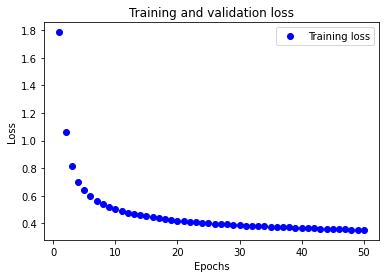

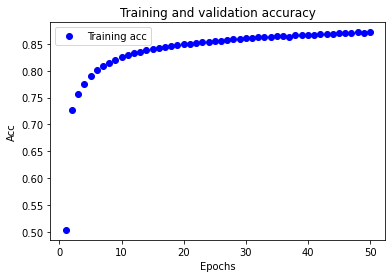

In [64]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
# plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
# val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
# plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 3s - loss: 0.3938 - accuracy: 0.8583 - 3s/epoch - 9ms/step
